In [1]:
from model import Gmail
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
G = Gmail()

### Get Labels

In [46]:
G.labels.label_id = G.labels.callLabelIds()
LABEL_NAMES = G.labels.names()
DEFAULT_LABELS = ['CATEGORY_PERSONAL','CATEGORY_SOCIAL','CATEGORY_FORUMS','IMPORTANT','CATEGORY_UPDATES'
                  ,'CHAT','SENT','INBOX','TRASH','CATEGORY_PROMOTIONS','DRAFT','SPAM','STARRED','UNREAD']
CUSTOM_LABELS = []
for label in LABEL_NAMES:
    if not label in DEFAULT_LABELS: CUSTOM_LABELS += [label]
CUSTOM_LABELS

['Unsubscribe',
 'Job Denial',
 'Github',
 'Job Recruiter Spam',
 'Job False Negative',
 'CU Alerts',
 'Bills',
 'MARC/MARC hours',
 'CU Email Lists',
 'MARC',
 'Cycling',
 'Canvas',
 'Low Confidence',
 'Job Applications',
 'Piazza',
 'Job Interview']

### Reset Labels (if necessary)

In [4]:
reset = False
idx = [1,8]
RESET_LABELS = [CUSTOM_LABELS[i] for i in idx]
SET_LABELS = ['INBOX','UNREAD']
if reset:
    for label in RESET_LABELS:
        print(label)
        G.labels.clearLabel([label],[label],SET_LABELS)
print('done')

done


In [6]:
del H['Low Confidence']
del H['Job False Negative']

In [49]:
idx = [2,8]
# HASH_LABELS = [CUSTOM_LABELS[i] for i in idx]
HASH_LABELS = CUSTOM_LABELS
H = {}
for label in HASH_LABELS:
    H[label] = G.hashMatch([label], freq=0.3, sample=100)
    print(f'length: {len(H[label])}')

sampling 0 messages matching ['Unsubscribe']
length: 0
sampling 5 messages matching ['Job Denial']
length: 460
sampling 100 messages of 207 matching ['Github']
length: 277
sampling 4 messages matching ['Job Recruiter Spam']
length: 1877
sampling 12 messages matching ['Job False Negative']
length: 286
sampling 2 messages matching ['CU Alerts']
length: 901
sampling 31 messages matching ['Bills']
length: 1513
sampling 6 messages matching ['MARC/MARC hours']
length: 772
sampling 100 messages of 393 matching ['CU Email Lists']
length: 5330
sampling 6 messages matching ['MARC']
length: 161
sampling 31 messages matching ['Cycling']
length: 739
sampling 100 messages of 372 matching ['Canvas']
length: 742
sampling 1 messages matching ['Low Confidence']
length: 304
sampling 100 messages of 136 matching ['Job Applications']
length: 186
sampling 100 messages of 765 matching ['Piazza']
length: 768
sampling 3 messages matching ['Job Interview']
length: 6982


### Some Testing

In [7]:
def E(msg):
    s = {}
    for x in H:
        s[x] = round(H[x].sim(G.messages.parseMessage(msg)),2)
    return {k: v for k, v in sorted(s.items(), key=lambda item: item[1], reverse=True)}

In [8]:
for i in range(10):
    msg = G.messages.popMessage()
    print()
    print(G.messages.parseMessage(msg)[:100])
    print(E(msg))


Your classmate posted a new Question. Problem 4 Part 3For judging which method is better at finding 
{'Piazza': 0.59, 'Job Applications': 0.09, 'Github': 0.04, 'CU Alerts': 0.03, 'MARC/MARC hours': 0.03, 'Cycling': 0.03, 'Canvas': 0.03, 'Unsubscribe': 0.02, 'CU Email Lists': 0.01, 'MARC': 0.01, 'Bills': 0.0}

You're receiving this email because rosc1351@colorado.edu is enrolled in CSCI 4022-001 at University
{'Piazza': 0.61, 'Job Applications': 0.1, 'Github': 0.04, 'MARC/MARC hours': 0.04, 'CU Alerts': 0.03, 'Unsubscribe': 0.02, 'MARC': 0.02, 'Cycling': 0.02, 'Canvas': 0.02, 'CU Email Lists': 0.01, 'Bills': 0.0}

Department of Applied MathematicsColloquium and SeminarsWeek of December 9th - December 13th***Mathe
{'Job Applications': 0.14, 'CU Alerts': 0.05, 'MARC': 0.03, 'Piazza': 0.03, 'MARC/MARC hours': 0.02, 'CU Email Lists': 0.02, 'Cycling': 0.02, 'Unsubscribe': 0.01, 'Github': 0.01, 'Bills': 0.01, 'Canvas': 0.01}

Specialized Bicycle Components just signed up to attend 2020 Just 

In [9]:
def evaluate(labelName, h):
    messages = G.labels.match([labelName])
    if len(messages) > 50:
        messages = random.sample(messages, 50)
    scores = []
    for m in messages:
        content = G.messages.parseMessage(m)
        s = h.sim(content)
        scores.append(s)
    return scores

KeyboardInterrupt: 

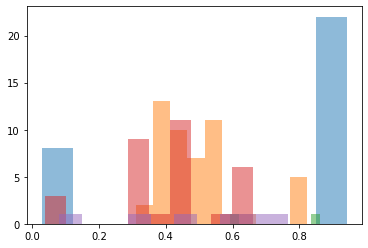

In [10]:
for lab in H:
    x = evaluate(lab, H[lab])
    plt.hist(x, alpha=.5)
plt.legend(H.keys())

In [ ]:
x = evaluate('Job False Negative', H['Job Applications'])
plt.hist(x)

### Time to sort

In [12]:
inbox = G.labels.match(['INBOX'])
len(inbox)

4711

In [14]:
del H['Piazza']

In [15]:
RM_LABELS = ['INBOX']
for i,msg in enumerate(inbox):
    print(f'{i/5537:.4f}', end='\r')
    content = G.messages.parseMessage(msg)
    changedLabel = False
    ML, MS = None, 0
    for L in H:
        score = H[L].sim(content)
        if score > .4:
            print(L, content[:50])
            G.labels.setLabel(msg, [L,'UNREAD'], RM_LABELS)
            changedLabel = True
        if score > MS:
            MS = score
            ML = L
    if not changedLabel:
        if MS > .25:
            print(f'*{L},{MS:.4f},{content[:50]}')
            G.labels.setLabel(msg, [L,'UNREAD', 'Low Confidence'], RM_LABELS)
            
print('done')

*Job Applications,0.2538,            TIAA eDelivery notification         @f
MARC Hi Undergrads of the MARC,MARC will be starting Fi
*Job Applications,0.2636, To see the full content of your email in a browse
*Job Applications,0.2608,November 2019 NewsletterHeroku Data Services with 
*Job Applications,0.2901,Hello students!You asked for more free tools and t
*Job Applications,0.2775,Your application has been submitted. Good luck!If 
*Job Applications,0.2748,Your application has been submitted. Good luck!If 
*Job Applications,0.2762,Your application has been submitted. Good luck!If 
*Job Applications,0.2650,You have received the alternative text version of 
*Job Applications,0.3152,                   #outlook a     .ReadMsgBody    
*Job Applications,0.2748,Plan, Deploy, and Optimize with ConfidenceYour AWS
*Job Applications,0.3152,                   #outlook a     .ReadMsgBody    
*Job Applications,0.2650,News from Full Cycle Bikes & The Tune UpEmail not 
*Job Applications,0.2538,News fr

KeyboardInterrupt: 

In [30]:
label = 'Job Applications'
H[label] = G.hashMatch([label], freq=0.15, sample=250)

sampling 250 messages of 437 matching ['Job Applications']


In [37]:
label = 'Job False Negative'
H[label] = G.hashMatch([label], freq=0.4, sample=100)

sampling 12 messages matching ['Job False Negative']


In [50]:
messages = G.labels.match(['Job Applications'])

In [51]:
CUSTOM_LABELS

['Unsubscribe',
 'Job Denial',
 'Github',
 'Job Recruiter Spam',
 'Job False Negative',
 'CU Alerts',
 'Bills',
 'MARC/MARC hours',
 'CU Email Lists',
 'MARC',
 'Cycling',
 'Canvas',
 'Low Confidence',
 'Job Applications',
 'Piazza',
 'Job Interview']

In [77]:
messages = G.labels.match(['Bills'])
for m in messages:
    content = G.messages.readMessage(m)
    print(content[:500])
    print()



http://secure-web.cisco.com/1HSJz5q7_ORrhm36v-xNHP50biJKNEsWlJYd59nbdqN9tSIrflNjCQrADNlTo1AxfSozwovEhEEIThvbG8oPU2G216wkziX7mZSa71RW_9ySDOQLX3frsB5F-A169kAyOBJvdzL4dfov4DCI2O8f3nq2mxL9T_GOuigfngRwHFN2b-2wCAN9vTxNmQw76cZQdgTwwT94MpC_OhAh1AvW47vp7xEJZC8ZSnhpigJM2jm5CszLI58VIqgj3BusLEqbE8qxmuSauFmtL2PHZ9A-wl0kS4t882hzGDvG2AIvgQksIT09xKM44054zbZKAq-ZOKZn_1dOUVKKf2pomD1xvnT-A3XVaV6o5pvfsDhxbPmhn7u1XwhG5mYUIxvU4xVHC-yXuIYAf0jbOWUmhPIZraL3ZZWHnSj_r0OdeGhUZYN7NluVednKI4eXug8Pvdz1vWf4F0cvNaia_qH6KVKaH



http://secure-web.cisco.com/1ncSslbfcgWCmsKxc37xaBSO1zZ7J87TStPuT5ywuwKHwODrPV9et8l2QMTpgXcfdfgBWeY5YVPV6zoUX0TcUotizH35Q8bijASjsA4jIm8P9Ajk0q_IN3U1tHPQH2w-ZYu8L1ydc3EKWVsB8lYwn7XW2FFh4IMIq7ZIOf_K2ysW1H01t25gH6ZDz9wZlTQqtqzPdnsVGeT4cJXfqGlyD658xhs0kYpeejI7pz-oQBLblpWASF4yZvZTpQUC3hqtSScztN7_DdptAnvFJf5An9PGhyxk0Peq0Rq7JfkfATaZXlqRTw_3fJoGeH4jkpcRCZoTEAdiFvWUNQwya_xoyPvyqposlW6wF26BrQ3R47AZiE3ZIjzuwdI0AexGQLNRsyPcqSlbfn8BaHRJLSXdbyXfJvoe7d8c4Dp_978VVcxvxuHrY-0UcFXIEA3gbNFvhy6H2JS_NZLdW9e63fGS3

<!DOCTYPE html>
                                                                        <html xmlns="http://www.w3.org/1999/xhtml">
                                                                        <head >
                                                                        <link href = "https://fonts.googleapis.com/css?family=Roboto+Condensed" rel = "stylesheet" />
                                                                        <link href = "https://maxcdn.bootstrapcdn.com/

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xmlns="http://www.w3.org/1999/xhtml" style="background-color: #f3f3f3; min-height: 100%;">
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
  <meta name="viewport" content="width=device-width" />
  <title>Greetings From Your Online Portal</title>
  
<style>body {
width: 100% !important; min-width: 100%; -web


Hello R

In [76]:
G.hashMatch(['Bills'],freq=.6)

sampling 31 messages matching ['Bills']


{'payment ', '.columns', 'enter"] ', 'pand tab', '.contain', 'ur Onlin', 'ckground', 'fset-10 ', '.small-4', '6   th.s', 'ia only ', 'dy body ', 'se .colu', '.button ', 'panded t', 'xpand   ', 'n td.sma', 'edia onl', 'all-1   ', 'ive a:vi', 'ble   ta', 'ble a   ', 'tton.war', 'yce Schu', 'undTable', 'small-5 ', 'utton.wa', 't-2   ta', 'l-1   td', 'l-7   th', 'choosing', 'ter"]   ', '.vertica', '.Externa', 'ical th ', 'oosing T', 'g   tabl', 't-pad-le', 'iny:acti', ' th.smal', 'able a  ', 'd-right ', ' table.b', 'xt-cente', '.body .l', 's #backg', 'r   tabl', 'y body a', 'et-4   t', '5   tabl', 'set-2   ', 've table', 'us body.', 'rge:acti', ':hover t', 'll-4   t', 'tive a:v', 'offset-7', '-pad-lef', 've a:vis', 'mn th.sm', 'l-offset', 's From Y', 'utton:ho', 'ed table', 'xpand ta', '.thumbna', 'dy.outlo', '5 a:visi', ' Your On', 'hultz,  ', ' .right-', ' Omnibus', 'ver .thu', 'ter }   ', 'enu th  ', 'panded c', 'ble.cont', 'l:hover ', 'on.succe', 'der   ta', 'l:focus ', 'l-vertic', 'lu

In [67]:
LABELS = ['Job Interview','Job Denial','Job Recruiter Spam']
for lab in LABELS:
    H[lab] = G.hashMatch([lab],freq=.5)
    print(len(H[lab]))

sampling 5 messages matching ['Job Interview']
3425
sampling 5 messages matching ['Job Denial']
163
sampling 12 messages matching ['Job Recruiter Spam']
2833


In [62]:

for m in messages:
    content = G.messages.parseMessage(m)
    ML, MS = None, 0
    for L in LABELS:
        s = H[L].sim(content)
        if s > MS:
            MS = s
            ML = L
    if MS > .4:
        print(f'{ML},{MS:.4f}, {content[:250]}')
        print()
    if MS > .5:
        G.labels.setLabel(m,[ML])

Job Recruiter Spam,0.5642, Greetings Royce,My name isRomit and I am a Sr. Recruiter at eTeam Inc. eTeam Incis a global contingency staffing firm servicing fortune 1000 clients across North America, Europe, and Asia.We have an excellent job opportunity with one of our clients.I

Job Recruiter Spam,0.9030, TalentHire - Simplified Recruiting and Staffing                                                                                                                                                                     HelloRoyceSchultzTitle:-AWS ArchitectL

Job Recruiter Spam,0.9489, TalentHire - Simplified Recruiting and Staffing                                                                                                                                                                     HelloRoyceSchultzMy name is Rathan G a

Job Denial,0.6130, Hi Royce,Thank you so much for your time and strong interest in PlayStation. Unfortunately, we have decided not to proceed with your candidacy a

In [45]:
print('done')

done


In [40]:
for m in messages:
    content = G.messages.parseMessage(m)
    s = H['Job Applications'].sim(content)
    s2 = H['Job False Negative'].sim(content)
    if s2 > .5:
        print(f'{s:.4f}, {s2:.4f}, {content[:50]}')

0.1012, 0.9072, Royce,Thank you for taking the time to apply to Ve


In [42]:

len(messages)

299